### NumPy, computación científica con Python

Facultad de Ingeniería - Universidad de la República - Uruguay

28 de julio de 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pln-fing-udelar/cursos/blob/master/tutoriales/NumPy-Intro.ipynb)

En este notebook veremos formas de trabajar con arrays multidimensionales (también llamados tensores) utilizando la biblioteca fundamental para computación científica de Python: NumPy. Esta biblioteca es un componente imprescindible de prácticamente todas las bibliotecas de aprendizaje automático en Python, porque provee una forma eficiente para trabajar con tensores (en particular, con matrices y vectores).



**Prerrequsitos**

- Suponemos que el lector tiene ya instalado un entorno de programación en Python
- Suponemos que el lector tiene instalado el package NumPy. [Aquí](https://numpy.org/install/) puede encontrar instrucciones para instalarlo.
- Suponemos que el lector conoce el lenguaje de programación Python y tiene alguna experiencia en programación.
- Suponemos que el lector tiene conocimientos básicos de álgebra lineal (aunque no es imprescindible)

**Referencias**

- [Introduction to NumPy]((https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf)) - Sebastian Raschka
- [An introduction to NumPy and SciPy](https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf) - M. Scott Shell

- [100 numpy exercises](https://github.com/rougier/numpy-100) - Nicolas Rougier


In [69]:
import numpy as np

## Este notebook fue elborado con la versión 2.0.2 de NumPy

np.__version__

'1.24.3'

### 0. Listas en Python

La forma básica de implementar arrays en Python son las _listas_:

In [70]:
lista = [0, 'a', 2, 3]
print(lista)

[0, 'a', 2, 3]


Las listas son una estructura muy poderosa, porque permiten (como se vio en el ejemplo anterior) intercalar diferentes tipos de datos en la misma lista y no tienen una longitud fija. Existen operadores para seleccionar elementos, aplicar funciones a cada elemento, agregar y quitar elementos, etc. Por más información sobre listas, se puede consultar la documentación de python, o infinidad de tutoriales en Internet. El problema de las listas es que tanta flexibilidad se paga con eficiencia. NumPy surge como la forma de poder obtener esa eficiencia, aunque perdiendo flexibilidad.

### 1. ndarrays

La estructura básica de NumPy es el array multidimensional (o `ndarray`), también llamados tensores. Los tensores incluyen los escalares (de dimensión 0), los vectores (de dimensión 1) y las matrices (de dimensión 2).  Estos arrays están almacenados en secciones continuas de memoria, y por lo tanto pueden ser cacheados fácilmente. Pero, para que esto sea posible, los arrays deben cumplir dos restricciones: tener largo fijo, y tener elementos de un solo tipo. Esto permite que NumPy pueda utilizar los más eficientes loops escritos en C y evitar muchos chequeos.

Comencemos por crear un un `ndarray` con 2 filas y 3 columnas (diremos que tiene dimensión 2x3, nombrando siempre primero las filas y luego las columnas):

In [71]:
a = np.array([[1,2,3],[4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


Los arrays son objetos, y tienen métodos asociados. Utilizamos  el método `dtype` para conocer el tipo de los elementos de `a`

In [72]:
print(a.dtype)

int32


En el caso anterior, el constructor dedujo el tipo de los elementos, pero esto puede decirse explícitamente a través del parámetro `dtype` en el momento de crear el array. Creemos el mismo array que en el punto anterior, pero con tipo `float32`:

In [73]:
a = np.array([[1,2,3],[4,5,6]], dtype=np.float32)
print(a)

b = np.array([[1,2],[3,4], [5,6],[7,8]], dtype=np.float32)
print (b)


[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]


La lista de tipos disponibles es muy grande. Consulte la [documentación](https://docs.scipy.org/doc/numpy/user/basics.types.html) de NumPy para la lista completa.

Los arrays pueden tener hasta 32 dimensiones diferentes, pero aquí veremos solamente los que tienen dimensión 1 (vectores), y 2 (matrices). Todas las operaciones que veremos pueden extenderse a arrays de mayor dimensión.

Si queremos conocer las dimensiones de un array, podemos utilizar el método `shape`, mientras que `ndim` nos dice el número de dimensiones, y `size` el número de elementos.


In [74]:
a.shape, b.shape

((2, 3), (4, 2))

In [75]:
a.ndim, b.ndim

(2, 2)

In [76]:
a.size, b.size

(6, 8)

Como mencionamos previamente, los vectores son casos especiales de los arrays, con dimension 1. Incluso es posible definir arrays con dimensión 0 (también conocidos como escalares).

In [77]:
c=np.array(['a','b','c','d','e'])
scalar=np.array(42)
c, scalar

(array(['a', 'b', 'c', 'd', 'e'], dtype='<U1'), array(42))

In [78]:
c.shape, scalar.shape

((5,), ())

Hay diferentes formas para facilitar la creación de arrays: pruebe los métodos `np.ones`, `np.zeros`, `np.eye` y `np.diag`. ¿Puede ver qué hace cada uno?

In [79]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [80]:
np.diag((3,3,3))

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

Si queremos crear un array con un rango, usamos `np.arange`, y si queremos generar puntos equiespaciados usamos `np.linspace` (muy útiles para crear gráficas)

In [81]:
np.linspace(0.,1.,num=10) #Array con 10 elementos, equiespaciados entre 0 y 1

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [82]:
np.arange(10,20,2) # Vector con números entre 10 y 20, de a dos (notar que el valor máximo no está incluido).

array([10, 12, 14, 16, 18])

Ejemplo: crearemos cree un vector con los puntos entre 0 y 50, con intervalos de 0.5, obtendremos el cuadrado de cada elemento, y lo mostraremos gráficamente (usando la biblioteca Matplotib).

In [83]:
import matplotlib.pyplot as plt

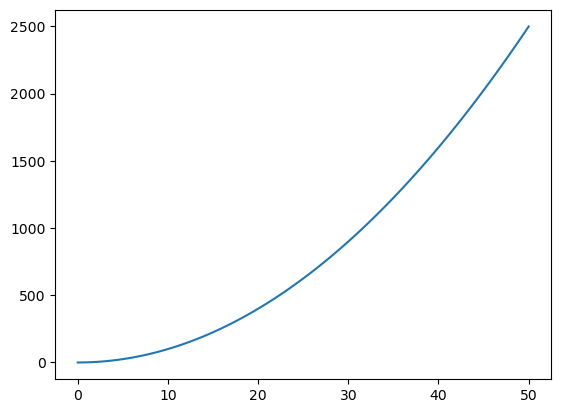

In [84]:
x=np.linspace(0.,50.,num=101)
y=x**2
plt.plot(x,y)

### 2.  Array indexing

Los arrays tienen  dimensiones (llamadas _axes_, plural de _axis_). La primera dimensión son las filas, y la segunda las columnas (y así sucesivamente con nuevas dimensiones). Entonces, para conocer el elemento de un array de dos dimensiones (i.e. una matriz) a, debe referenciarse como `a[fila, columna]`. Los elementos se numeran (siguiendo el estándar de Python), comenzando en 0.

Construyamos una matriz de 4x3. Asignemos el valor 0 al elemento situado en la primera columna y segunda fila. Lo mismo con el elemento ubicado en la columna 2, fila 1.

In [85]:
z=np.eye(4)
z=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
z

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [86]:
z[1,0]=0
z[1,2]=0
z

array([[ 1,  2,  3],
       [ 0,  5,  0],
       [ 7,  8,  9],
       [10, 11, 12]])

Igual que en las listas de Python, pueden seleccionarse rangos de elementos, además de elementos individuales. La forma básica es i:j:k, donde i es el índice de inicio, j el de fin (no incluido), y k es el paso. Si los índices de inicio y fin se omiten, entonces se asume que es desde el principio o final, respectivamente. Si el paso se omite, se considera que es 1.

Por ejemplo, para seleccionar los elementos de las tres primeras filas, y de las columnas 1 y 2, utilizamos:

In [87]:
z[0:3,1:3]

array([[2, 3],
       [5, 0],
       [8, 9]])

El indexado en Numpy permite seleccionar desde el final hacia atrás (utilizando índices negativos), y especificar un axis completa, utilizando la notación ':' (esto es, se seleccionan todos los elementos del axis). Por lo tanto, para seleccionar la última fila, basta poner:

In [88]:
z[-1,:]

array([10, 11, 12])

También es posible utilizar pasos negativos, lo que nos da una forma muy elegante de invertir un vector

In [89]:
v = [1,2,3,4,5]
v[::-1]

[5, 4, 3, 2, 1]

### 3. Funciones universales y broadcasting

Las funciones matemáticas en NumPy tienen un comportamiento muy uniforme: se aplican a todos los elementos del array. Esto hace que prácticamente nunca sea necesario iterar por los arrays. Por ejemplo, si queremos saber la raíz cuadrada de cada elemento de z, simplemente hacemos:

In [90]:
np.sqrt(z)

array([[1.        , 1.41421356, 1.73205081],
       [0.        , 2.23606798, 0.        ],
       [2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162]])

Si queremos sumarle 1 a todos los elementos de z...

In [91]:
z+1

array([[ 2,  3,  4],
       [ 1,  6,  1],
       [ 8,  9, 10],
       [11, 12, 13]])

En el paso anterior, intervino uno de los aspectos más interesantes de NumPy: el _broadcasting_. Cuando una operación involucra dos elementos con diferentes dimensiones (en el caso anterior, una matriz y un escalar), NumPy intenta "completar" las dimensiones de forma inteligente (en el caso anterior, transformando el escalar 1 en una matriz de 3x3 con 1s).

Antes de continuar con el broadcasting, un comentario importante: el objetivo principal de NumPy es realizar de forma _eficiente_ operaciones aritméticas. Por eso, para realizar operaciones sobre matrices siempre es conveniente utilizar las operaciones de NumPy y no hacerlo "a mano" utilizando loops. Comparemos los tiempos de la operación anterior versus un loop doble que suma 1 a cada elemento de z (y que, por supuesto, obtiene el mismo resultado).

In [92]:
%%timeit -n 100000

zmas1=np.zeros((4,3))
for i in range(4):
  for j in range(3):
    zmas1[i,j] = z[i,j] + 1


8.26 µs ± 399 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [93]:
%%timeit -n 100000
zmas1 = z +1

1.45 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Podemos ver que es _mucho_ más lenta. Lo cual es bastante obvio, si tenemos en cuenta que NumPy utiliza código de bajo nivel para optimizar la eficiencia de estas operaciones.

Continuemos con el broadcasting. Intentemos sumar una matriz con dos filas y una columna y una con tres filas y dos columnas.

In [94]:
a=np.ones((2,1))
b=np.ones((2,2))

print(a)
print(b)
print(a+b)

[[1.]
 [1.]]
[[1. 1.]
 [1. 1.]]
[[2. 2.]
 [2. 2.]]


En este caso, como la segunda matriz tiene la misma cantidad de filas que la segunda, pero el doble de columnas, el broadcasting sumó la única columna de la primera matriz a cada una de las columnas de la segunda.

Si intentáramos sumar a la matriz obtenida una matriz de 3x2, obtendríamos un error del tipo 'ValueError: operands could not be broadcast together with shapes (2,3) (4,2)'

In [95]:
 # c=np.ones((3,2))
 # a+b+c  # Esto no funciona!

Siempre que se aplica una función universal, se aplica por defecto a todos los elementos del array. Por ejemplo, la siguiente función suma todos los elementos de la matriz z

In [96]:
print(np.sum(z))

68


Si lo que queremos es aplicar una operación a los elementos de cada columna, agregamos el parámetro axis=0 al método correspondiente (recordamos que el axis 0 es el que se mueve por las filas, y el axis 1 por las columnas). Es importante recordar esta convención, porque es un recurso muy utilizado en NumPy para obtener subtotales o aplicar operaciones a todas las filas o columnas de una matriz.

In [97]:
print(z)
np.sum(z, axis=0)

[[ 1  2  3]
 [ 0  5  0]
 [ 7  8  9]
 [10 11 12]]


array([18, 26, 24])

Por supuesto, para sumar en cada filas, indicamos la segunda axis. Utilizaremos una sintaxis alternativa en este caso: cada array es un objeto con sus propios métodos.

In [98]:
z.sum(axis=1)

array([ 6,  5, 24, 33])

### 4. Operaciones de Comparación y Máscaras

Una forma adicional de indexar un array es a través de una _máscara_: un vector Booleano que indica qué elementos del array elegir y cuáles descartar.

In [99]:
a=np.array([1,2,3,4,5,6,7,8])
mask=np.array([True, False, True, True, True, False, False, False])

a[mask]


array([1, 3, 4, 5])

Esto no parece muy interesante, pero se vuelve muy potente cuando vemos que existen operaciones de comparación que devuelven vectores booleanos para los elementos que cumplen una cierta condición:

In [100]:
a>4

array([False, False, False, False,  True,  True,  True,  True])

In [101]:
a[a>4]

array([5, 6, 7, 8])

Es posible combinar condiciones on operaciones booleanas & (and) y | (or):

In [102]:
print(a[(a>4) & (a%3==0)])

[6]


Se puede utilizar también la función `np.where` para transformar cada elemento de un array, devolviendo un valor en caso de cumplirse la condición, y otro en caso de no ser así.

In [103]:
np.where(z>1,1,0) # Devuelvo una matriz con un 1 en las posiciones donde la matriz original tiene un valor mayor a 1

array([[0, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1]])

### 5. Reshaping y concatenación

NumPy provee formas de cambiar la forma a un array. Esto es muy importante porque, aunque los arrays tienen tamaño fijo, su forma puede cambiar sin necesidad de tener que copiar a un nuevo espacio de memoria los valores (algo que podría ser muy costoso en el caso de arrays muy grandes).

In [104]:
zprima=z.reshape((6,2))
zprima

array([[ 1,  2],
       [ 3,  0],
       [ 5,  0],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

Tenga en cuenta que las operaciones sobre arrays en NumPy generalmente devuelven una _vista_ nueva (es decir, no se hace una copia). En el ejemplo anterior, verificamos la forma de z.

In [105]:
z

array([[ 1,  2,  3],
       [ 0,  5,  0],
       [ 7,  8,  9],
       [10, 11, 12]])

In [106]:
np.may_share_memory(z,zprima)

True

z y zprima son diferentes vistas sobre la misma zona de memoria.  Esto es muy importante desde el punto de vista de la eficiencia.

¿Qué pasa si queremos agregar una nueva dimensión a las que tiene z? Por ejemplo, hacer reshape a (2,2,3).

In [107]:
zsegunda=z.reshape((2,2,3))
zsegunda

array([[[ 1,  2,  3],
        [ 0,  5,  0]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Podemos utilizar -1 en un axis para que NumPy asegure que el número total de elementos se mantenga:

In [108]:
ztercera=z.reshape((2,2,-1))
ztercera

array([[[ 1,  2,  3],
        [ 0,  5,  0]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Si queremos concatenar dos arrays, usamos `np.concatenate`. Atención: esto puede ser ineficiente, porque devuelve una copia (ya que cambia el tamaño total). Como antes, el parámetro `axis` permite especificar por qué dimensión deben concatenarse los arrays.

In [109]:
# Por defecto, se concatena por axis=0, es decir por las filas
np.concatenate((z,z))

array([[ 1,  2,  3],
       [ 0,  5,  0],
       [ 7,  8,  9],
       [10, 11, 12],
       [ 1,  2,  3],
       [ 0,  5,  0],
       [ 7,  8,  9],
       [10, 11, 12]])

In [110]:
np.concatenate((z,z), axis=1)

array([[ 1,  2,  3,  1,  2,  3],
       [ 0,  5,  0,  0,  5,  0],
       [ 7,  8,  9,  7,  8,  9],
       [10, 11, 12, 10, 11, 12]])

Otra forma útil de explícitamente concatenar vertical u horizontalmente vectores o matrices es a través del uso de `vstack` (pila vertical) o `hstack` (concatenación horizontal). Veamos algunos ejemplos:

In [111]:
v1 = np.ones(3)
v2 = np.zeros(3)

print(np.vstack((v1,v2)))
print(np.hstack((v1,v2)))

[[1. 1. 1.]
 [0. 0. 0.]]
[1. 1. 1. 0. 0. 0.]


In [112]:
# También funciona con matrices
m1 = np.array([[1,2],[3,4]])
m2 = np.array([[3,1],[3,2]])

print(np.vstack((m1,m2)))

[[1 2]
 [3 4]
 [3 1]
 [3 2]]


### 6. Producto interno de vectores y multiplicación de matrices

NumPy provee funciones básicas de álgebra lineal. Hasta ahora hemos visto cómo crear y manipular vectores y matrices. Veamos algunas operaciones algebraicas que podemos aplicar.

Tengamos primero en cuenta que los arrays unidimensionales en Python no tienen, conceptualmente, "una fila" o "una columna", ya que solamente tienen (por definición) una dimensión. De todas formas, el mecanismo de brodcasting los transformará en una matriz $n\times 1$ o $1\times n$ según sea necesario para la operación.

In [113]:
v=np.array([10,10,10])
v.shape

(3,)

In [114]:
# Construimos una matriz con las tres primeras filas de la matriz z
m=z[:2,:]
m

array([[1, 2, 3],
       [0, 5, 0]])

Para sumar dos matrices, sus tamaños deben ser compatibles, o permitir hacer broadcasting. Y luego, la operación se hace elemento a elemento

In [115]:
m+v

array([[11, 12, 13],
       [10, 15, 10]])

In [116]:
m.shape, v.shape, (m+v).shape

((2, 3), (3,), (2, 3))

En el ejemplo anterior, la matriz tiene dimensiones 2x3 (2 filas, 3 columnas), por lo que NumPy considera al vector a como una matriz de 1x3 (es decir, como un vector fila), y lo replicará dos veces para sumarlo a cada una de las filas de w y así obtener nuevamente una matriz 2x3. Sin embargo, si intentamos sumar la matriz traspuesta de w (i.e. aquella que tiene intercambiadas columnas y filas), la operación fallará, por la forma en la que funciona el broadcasting.  [Aquí](https://numpy.org/doc/stable/user/basics.broadcasting.html) puede ver en detalle los mecanismos de broadcasting de NumPy.

Podemos multiplicar, de esta forma, un escalar por una matriz:

In [117]:
m*8

array([[ 8, 16, 24],
       [ 0, 40,  0]])

Es posible calcular en NumPy el producto interno entre dos vectores, utilizando la operación `dot`. Dados los vectores $v$ y $w$, ambos de dimensión n, su producto interno $v \cdot w$ = $\sum_{1}^{n} v_n \times w_n$, siendo $v_i$ y $w_i$ los elementos en la posición $i$ en $v$ y $w$, respectivamente.

In [118]:
v1 = np.array([1,2,3])
v2 = np.array([1,1,0])

np.dot(v1,v2)

3

También es posible en NumPy hacer productos de matrices (es decir, tensores de dimensión 2). Dado $A(n,p)$ y $B(p,m)$, $A.B=C$, donde $C=((c_{ij}))$ and $c_{ij}=\Sigma_{h=1}^p a_{ih}b_{hj}$. El producto entre matrices puede verse como la composición de las transformaciones lineales que cada una representa. Para que la multiplicación de matrices funcione, sus dimensiones deben ser compatibles: si tenemos una matriz de dimensiones mxn, y la multiplicamos por otra matrix pxq, necesariamente p debe ser igual a q, y la matriz resultado tendrá dimensiones mxq.



In [119]:
m1 = np.ones((3,4)) # Matriz de 3x4
m2 = np.array([[1,2],[3,4],[5,6],[7,8]]) # Matriz de 4x2

np.matmul(m1,m2) # w1@w2 es equivalente; np.dot(w1,w2) también funciona, pero no se recomienda

array([[16., 20.],
       [16., 20.],
       [16., 20.]])

Si intentamos multiplicar el vector v por la matriz m, no funcionará, porque sus dimensiones son incompatibles: el vector puede verse como de  dimensiones 1x3, y la matriz tiene dimensiones 2x3... y justamente el error que obtendremos es:  `ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)`

In [120]:
# np.dot(a,w) # No funciona

Pero veamos qué sucede si cambiamos el orden de las matrices:

In [121]:
print(m)
print(v)
np.matmul(m,v)

[[1 2 3]
 [0 5 0]]
[10 10 10]


array([60, 50])

En este caso, las dimensiones de las matrices sí son compatibles, ya que m tiene dimensión $2 \times 3$, y v puede verse como una matriz $4 \times 1$, por lo que obtendremos una matriz de dimensiones 2x1 como resultado (en realidad... un vector). El uso de "puede verse" no es casual... podría ser también 1x4, de ser necesario. Veamos cómo luce `v.transpose()`:

In [122]:
v.transpose()

array([10, 10, 10])

Tal vez esperábamos un "array columna", pero tal concepto no existe. Si quisiéramos explícitamente hacerlo, debemos aumentar una dimensión, para tener una matriz (4,1). El operador `np.newaxis` nos permite hacerlo:

In [123]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

Observemos que, si la nueva dimensión la creamos en las filas, en realidad obtenemos una matrix de dimensión (1,4) (que no es lo mismo que el array original, aunque lo parezca)

In [124]:
a[np.newaxis,:].shape,a[np.newaxis,:]


((1, 8), array([[1, 2, 3, 4, 5, 6, 7, 8]]))

Si multiplicamos dos vectores, obtenemos simplemente su producto interno:

In [125]:
a=[1,2,3,4]
b=[-1,1,2,1]
np.dot(a,b)

11

### 7. Polinomios

NumPy permite trabajar directamente con polinomios. Un polinomio puede definirse como un vector y, por ejemplo, obtener su raíces utilizando el método `np.roots`. Por ejemplo, para obtener las raices (complejas) del polinomio $x^2 + 1$.

In [126]:
np.roots([1,0,1])

array([-0.+1.j,  0.-1.j])

A la inversa, podemos obtener, a partir de las raíces polinomiales, los coeficientes del polinomio

In [127]:
np.poly([0,2,4])

array([ 1., -6.,  8.,  0.])

En este caso, el resultado es $x^3 -6x^2 + 8x$

Podemos también evaluar un polinomio en un punto dado. Verifiquemos que, efectivamente, 2 es una raíz del polinomio obtenido en el paso anterior.

In [128]:
np.polyval([1,-6,8,0], 2)

0

Solo utilizando NumPy es posible ajustar un polinomio de cualquier orden especificado a un conjunto de valores dados (utilizando el método de mínimos cuadrados). Para ello, utilizamos el método `np.polyfit`, especificando las coordenadas x e y de cada punto a interpolar. Por ejemplo, para interpolar los puntos (0,0), (1,1.2), (2.1,4.1) con un polinomio de orden 2:

In [129]:
fit=np.polyfit([0,1,2.1],[0,1.2,4.1],2)
print(fit)

[ 6.83982684e-01  5.16017316e-01 -4.65903537e-16]


### 8. Números aleatorios

NumPy incluye rutinas para la generación de números pseudoaleatorios, que se generan en forma determinista a partir de una semilla, pero que tienen propiedades similares a una secuencia realmente aleatoria. El módulo `random` permite acceder a las rutinas adecuadas.

Lo primero que debemos hacer es setear la semilla (al menos, si queremos que el proceso sea reproducible)

In [130]:
np.random.seed(42)

Con esto, podemos, por ejemplo, generar una array de números aleatorios con distribución U\[0,1) (uniforme entre 0 y 1), o una matriz,... o un escalar

In [131]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [132]:
np.random.rand(2,2)


array([[0.15599452, 0.05808361],
       [0.86617615, 0.60111501]])

In [133]:
np.random.rand()

0.7080725777960455

Si queremos especificar el rango, usamos `randint` (con mínimo y máximo del rango como argumentos)

In [134]:
np.random.randint(5)

4

Si queremos especificar otras distribuciones, en el módulo hay disponibles muchos generadores diferentes. Por ejemplo:

In [135]:
np.random.normal(0, 1)

-0.580878134023515

Genera un número extraído de una distribución gaussiana con media 0 y desviación estándar 1.

Si queremos más de un número, utilizamos el parámetro `size`:

In [136]:
np.random.normal(0,1,size=10)

array([-0.52516981, -0.57138017, -0.92408284, -2.61254901,  0.95036968,
        0.81644508, -1.523876  , -0.42804606, -0.74240684, -0.7033438 ])

Una función interesante del módulo es `shuffle`, que permite permutar aleatoriamente una lista

### 9. Más NumPy

NumPy provee muchas funciones para álgebra lineal (`np.linalg`), ordenamiento y búsqueda (`np.sort`), estadísticas básicas, entre muchas otras. Todas utilizan los arrays aquí presentados, y la misma lógica de utilizar funciones universales como las que se presentaron.  Es sin duda la biblioteca más importante del ecosistema de Python para ciencia de datos, y entender sus fundamentos facilita  muchísimo el trabajo posterior, especialmente para las técnicas de aprendizaje automático. La biblioteca SciPy se apoya en NumPy para proveer funciones de computación científica más complicadas. Otras bibliotecas como Matplotlib, Pandas, Scikit-learn, o PyTorch, también utilizan en NumPy para sus computaciones básicas.